## 3.2.2 계단 함수 구현하기

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들인다. 즉, step_function(3.0)은 되지만 numpy array를 인수로 넣을 수 없다.

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int64)

In [4]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

numpy 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.

In [6]:
y = y.astype(np.int64)
y

array([0, 1, 1], dtype=int64)

이처럼 numpy 배열의 자료형을 변환할 때는 astype() 메서드를 이용

In [7]:
y = step_function(x)
y

array([0, 1, 1], dtype=int64)

## 3.2.3 계단 함수의 그래프

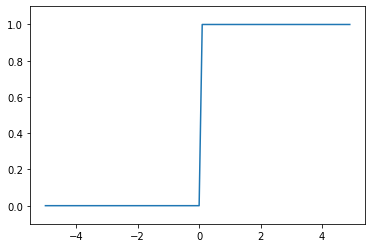

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x> 0, dtype = np.int64)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0전까지 0.1 간격의 numpy 배열 생성
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.4 sigmoid 함수 구현하기

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

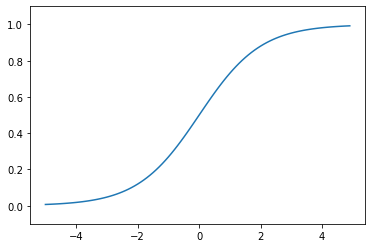

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

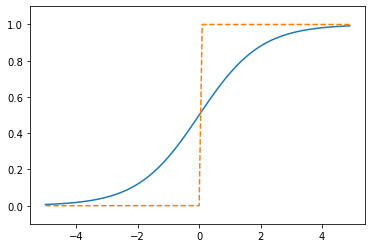

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, linestyle="--")
plt.ylim(-0.1, 1.1)
plt.show()

## ReLU 함수

In [13]:
def relu(x):
    return np.maximum(0, x)

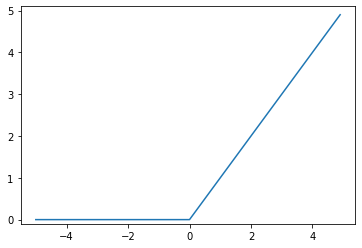

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [15]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [16]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


### 3.3.2 행렬의 곱

### (2×2)*(2×2)

In [17]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [18]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [19]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

### (2×3)*(3×2)

In [20]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

### (3×2)*2

In [21]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
print(A.shape)
print(B.shape)
np.dot(A,B)

(3, 2)
(2,)


array([23, 53, 83])

### 3.3.3신경망에서의 행렬 곱

In [22]:
X = np.array([1,-2])
X.shape

(2,)

In [23]:
W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)

[[1 3 5]
 [2 4 6]]
(2, 3)


In [24]:
Y = np.dot(X, W)
Y

array([-3, -5, -7])

### 3.4 3층 신경망 구현하기

In [25]:
import numpy as np

In [26]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [27]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [29]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [30]:
W2 = np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [31]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [32]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


### 3.4.3 구현 정리

In [33]:
# 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) 
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 입력 신호를 출력으로 변환하는 처리 과정
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 3.5.1 항등함수와 softmax 함수 구현하기

In [34]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [35]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [36]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [37]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [38]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-38-23103c906500>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-38-23103c906500>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [39]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [40]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [41]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [42]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0